# ÇOK SERBESTLİK DERECELİ BİR KAYMA ÇERÇEVESİNİN YER HAREKETİ ALTINDAKİ TEPKİSİ

Örnek olarak dört serbestlik dereceli bir sistem kullanılacak. Sistemin kütle be rijitlik matrislerini yükleyelim

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
from newmark_function import newmark

#%%Sistemin tanımlanması
k=48e6
m=30000

M=m*np.array([[1,0, 0, 0],
            [0, 1, 0, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 1]])
dof=M.shape[0]

K=np.array([[2*k,-k, 0, 0],
            [-k, 2*k, -k, 0],
            [0, -k, 2*k, k],
            [0, 0, -k, k]])

Özdeğer analizi ile tanımlanan sistemin özdeğerlerini ve özdeğer vektörlerini tanımlayalım

In [4]:
#%% Özdeğerlerin ve özdeğermatrislerinin hesaplanması
As = np.dot( np.linalg.inv(M) , K)

V,D = np.linalg.eigh(As) #Eigenvectors and eigenvalues

w = [np.sqrt(item) for item in V]
T = [2*np.pi/item for item in w]
T, D


([0.45229277608884433,
  0.15707963267948966,
  0.1025264487527213,
  0.0835803268030969],
 array([[-2.28013429e-01,  5.77350269e-01,  6.56538502e-01,
         -4.28525073e-01],
        [-4.28525073e-01,  5.77350269e-01, -2.28013429e-01,
          6.56538502e-01],
        [-5.77350269e-01, -2.24795076e-17, -5.77350269e-01,
         -5.77350269e-01],
        [-6.56538502e-01, -5.77350269e-01,  4.28525073e-01,
          2.28013429e-01]]))

Modların modal katkı faktörlerini hesaplayalım

In [5]:
M=np.dot((np.dot(D,M)),(np.transpose(D)))

T_D=np.transpose(D)
L = np.zeros( dof )

for  xx , norm_deger in enumerate(D[dof-1 , :]):
    A1=np.dot(T_D[xx,:],M)
    L[xx]=np.dot(A1,np.ones(dof))/M[xx,xx]

In [6]:
L

array([-1.89042727,  0.57735027,  0.27969988, -0.12132341])

- Yer hareketini yükleyelim
- Başlangıç öteleme ve hız değerlerini 0,0 alalım
- Her bir moddaki sönüm oranının 0.05 olduğunu kabul edelim
- Yapının her bir moda ait m,c,k değerleri ile Newmark fonksiyonunu çağıralım ve o modlara ait öteleme,
hız ve ivme serilerini elde edelim

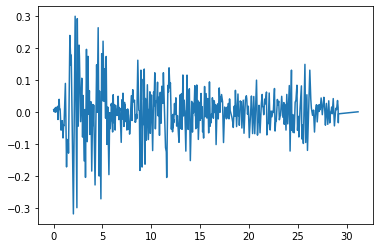

In [7]:
#%% Newmark Uygulaması
g_txt=np.loadtxt('ElCentroErsin.txt') #Units in g
sn=len(g_txt)
gmotion=g_txt[:,1]
len_gmotion=gmotion.shape[0]
start_t = 0;
dt = 0.02; #sec
end_t = (sn-1)*dt;
t=np.arange(0,(sn*dt),dt)
plt.plot(t,gmotion) #Yer hareketinin doğru alınıp alınmadığının kontrolü amacıyla çizdirilmesi

x0 = 0; #Başlangıç yerdeğiştirme ve hızı
v0 = 0;

beta = 1/4;
gamma = 1/2;


x = np.zeros((len_gmotion,dof))
v = np.zeros((len_gmotion,dof))
a = np.zeros((len_gmotion,dof))
pi = math.pi;

for i in range(dof):
    
    m = 1; # kg
    Tsingle = T[i]; # sec
    f = 1/Tsingle;  # Hz
    w = 2*pi*f; # rad/sec
    k = m*w**2; # N/m
    eps = 0.05;  # damping ratio
    c= 2*eps*w*m;  # N.sec/m
    
    scale=1/np.amax(gmotion)
    p_exc = -m*scale*gmotion*9.806;

    x[:,i], v[:,i], a[:,i] = newmark(m, c, k, dt, p_exc, beta, gamma, x0, v0);
    

- Elde ettiğimiz değerlere neye karşılık geliyor?
- Modların fiziksel sistemdeki öteleme değerlerine katkılarını bulmak için ne yapmak gerekiyor?
- Sisteme örneğin birinci mod fiziksel katkısını gösteren t anındaki değerlerin bir vektör olması ne anlama geliyor?
- Sistemin toplam tepkisini nasıl elde edilir?
- Uygulamanın sonunda sistemin öteleme, hız ve ivme serilerini bulmak hedeflenmektedir.
- Ayrıca bu serilerin en büyük değerlerini bulup, bu büyüklüğün oluştuğu t anının modal katkıların en büyük değere ulaştığı anla aynı olup olmadığının da kontrol edilmesi gerekiyor.
- Başarılar
